In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing
%matplotlib inline

import plotly

In [5]:
%%time
fa_dir = '/Users/yiqiongzhu/Desktop/Spring_2018/DSO 562/Project1'
mydata = pd.read_csv(fa_dir + '/NY_Property_Cleaned.csv')

CPU times: user 9.45 s, sys: 1.07 s, total: 10.5 s
Wall time: 11 s


In [6]:
numrecords = len(mydata)
print(numrecords)

1048575


In [7]:
mydata.head()

,Unnamed: 0,RECORD,BBLE,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,...,BLDVOL,FULL_LOT,FULL_BAREA,FULL_BVOL,LAND_LOT,LAND_BAREA,LAND_BVOL,TOT_LOT,TOT_BAREA,TOT_BVOL
0,1,1,3046020035,4602,35,NaN,DESMOND CAMPBELL,B1,1,18.000000,...,23328.000000,226.111111,628.086420,17.446845,6.853889,19.038580,0.528849,10.853889,30.149691,0.837491
1,2,2,5046820019,4682,19,NaN,CINISOMO MARIO,A5,1,25.000000,...,36414.000000,166.000000,581.232493,11.396716,5.320400,18.628852,0.365272,8.524800,29.848739,0.585269
2,3,3,3074790028,7479,28,NaN,GANGICHIODO DONALD,V0,1B,16.000000,...,125000.000000,421.052632,51.200000,1.024000,0.266447,0.032400,0.000648,0.266447,0.032400,0.000648
3,4,4,4027980132,2798,132,NaN,DCAS,V0,1B,21.000000,...,125000.000000,71.500317,45.045200,0.900904,1.231746,0.776000,0.015520,1.231746,0.776000,0.015520
4,5,5,1006950027E,695,27,E,CONRAIL,U6,3,165.317669,...,172973.088976,102.692797,1033.707817,16.237829,30.454831,306.558963,4.815531,46.100085,464.044413,7.289365


,FULL_LOT,FULL_BAREA,FULL_BVOL,LAND_LOT,LAND_BAREA,LAND_BVOL,TOT_LOT,TOT_BAREA,TOT_BVOL
0,231.496578,703.232887,38.214413,5.791227,18.115871,0.891746,9.748129,30.560774,1.730366
1,231.496578,703.232887,38.214413,5.791227,18.115871,0.891746,9.748129,30.560774,1.730366
2,165.930893,250.212181,5.663927,8.658694,7.827893,0.192203,13.270314,8.040340,0.196687
3,165.930893,250.212181,5.663927,8.658694,7.827893,0.192203,13.270314,8.040340,0.196687
4,913.410575,1337.274588,102.548756,164.066731,237.725978,18.990887,247.881519,362.763866,28.989438
5,231.496578,703.232887,38.214413,5.791227,18.115871,0.891746,9.748129,30.560774,1.730366
6,229.884419,704.068340,126.849367,41.003877,205.425204,40.310278,100.475965,319.103671,57.076276
7,231.496578,703.232887,38.214413,5.791227,18.115871,0.891746,9.748129,30.560774,1.730366
8,231.496578,703.232887,38.214413,5.791227,18.115871,0.891746,9.748129,30.560774,1.730366
9,231.496578,703.232887,38.214413,5.791227,18.115871,0.891746,9.748129,30.560774,1.730366


In [8]:
mydata.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
Unnamed: 0,1,2,3,4,5,6,7,8,9,10
RECORD,1,2,3,4,5,6,7,8,9,10
BBLE,3046020035,5046820019,3074790028,4027980132,1006950027E,4031810007,4051861001,3082020064,4052570008,3070780050
BLOCK,4602,4682,7479,2798,695,3181,5186,8202,5257,7078
LOT,35,19,28,132,27,7,1001,64,8,50
EASEMENT,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN
OWNER,DESMOND CAMPBELL,CINISOMO MARIO,GANGICHIODO DONALD,DCAS,CONRAIL,BERGERSON ERIC W,GOLDEN HUANG LLC,"SPICER, CLINTON",SILVIA SIPAVICIUS,ABHAS CHAUDHURI
BLDGCL,B1,A5,V0,V0,U6,A5,R5,B1,A1,C0
TAXCLASS,1,1,1B,1B,3,1,4,1,1,1
LTFRONT,18,25,16,21,165.318,20,104.825,24,40,24


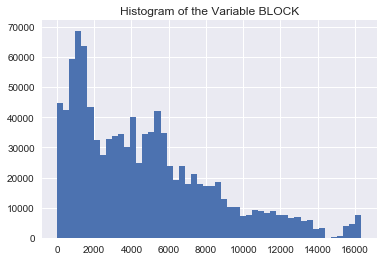

In [5]:
plt.hist(mydata['BLOCK'],bins=50)
plt.title('Histogram of the Variable BLOCK')
plt.show()

In [39]:
mydata[mydata['STORIES'].notnull()].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RECORD,996433.0,524255.083674,3.026881e+05,1.0,262141.0,524195.0,786409.0,1.048575e+06
BLOCK,996433.0,4714.726049,3.680453e+03,1.0,1531.0,3966.0,6815.0,1.635000e+04
LOT,996433.0,375.114518,8.586263e+02,1.0,23.0,49.0,149.0,9.978000e+03
LTFRONT,996433.0,34.584761,6.007839e+01,0.0,19.0,25.0,40.0,9.999000e+03
LTDEPTH,996433.0,86.674423,6.304995e+01,0.0,81.0,100.0,100.0,9.999000e+03
STORIES,996433.0,5.063363,8.431372e+00,1.0,2.0,2.0,3.0,1.190000e+02
FULLVAL,996433.0,875899.112931,8.695251e+06,0.0,324900.0,456000.0,627000.0,5.279000e+09
AVLAND,996433.0,74486.808180,2.149881e+06,0.0,9639.0,13757.0,19535.0,1.792809e+09
AVTOT,996433.0,225271.714590,6.093373e+06,0.0,18931.0,25642.0,46103.0,4.668309e+09
EXLAND,996433.0,25600.262042,1.994306e+06,0.0,0.0,1620.0,1620.0,1.792809e+09


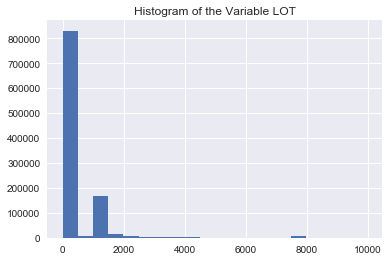

In [7]:
plt.hist(mydata['LOT'],bins=20)
plt.title('Histogram of the Variable LOT')
plt.show()

Text(0,0.5,u'Count')

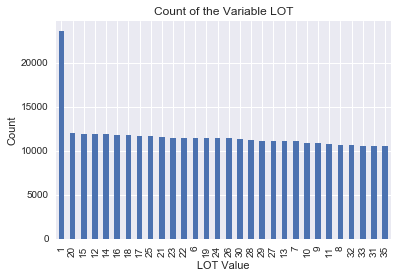

In [8]:
mydata['LOT'].value_counts().head(30).plot(kind='bar')
plt.title('Count of the Variable LOT')
plt.xlabel('LOT Value')
plt.ylabel('Count')

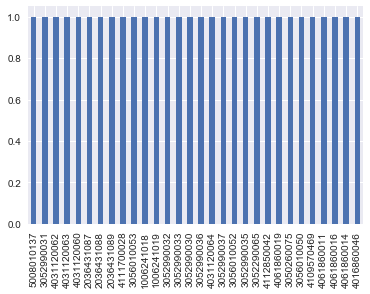

In [ ]:
mydata.describe().transpose()

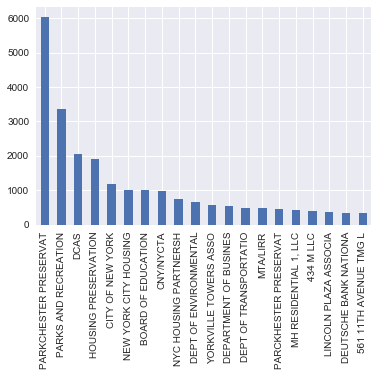

In [16]:
mydata['OWNER'].value_counts().head(20).plot(kind='bar')

Text(0.5,1,u'EASEMENT Count')

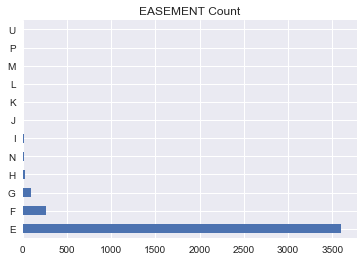

In [12]:
mydata['EASEMENT'].value_counts()[:20].plot(kind='barh')
plt.title('EASEMENT Count')

Text(0.5,1,u'OWNER Count')

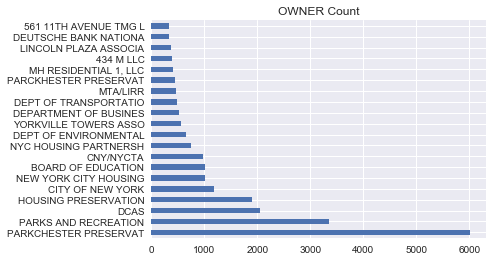

In [11]:
mydata['OWNER'].value_counts()[:20].plot(kind='barh')
plt.title('OWNER Count')

Text(0.5,1,u'BLOCK Count')

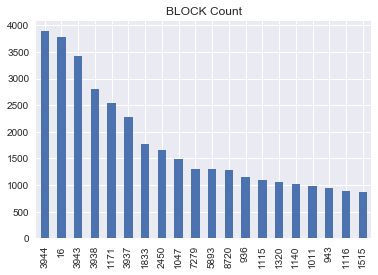

In [18]:
mydata['BLOCK'].value_counts().head(20).plot(kind='bar')
plt.title('BLOCK Count')

Text(0.5,1,u'BLDGCL Count')

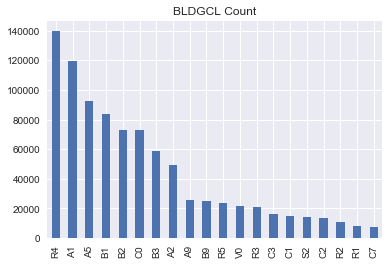

In [19]:
mydata['BLDGCL'].value_counts().head(20).plot(kind='bar')
plt.title('BLDGCL Count')

In [1]:
mydata['STADDR'].value_counts().head(20).plot(kind='barh')
plt.title('STADDR Count')

for i, v in enumerate():
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

NameError: name 'mydata' is not defined

Text(0.5,1,u'EASEMENT Count')

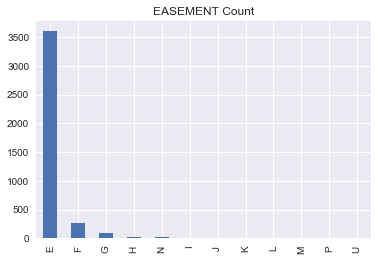

In [13]:
mydata['EASEMENT'].value_counts().plot(kind='bar')
plt.title('EASEMENT Count')

Text(0.5,1,u'TAXCLASS Count')

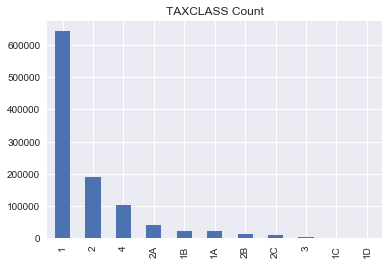

In [20]:
mydata['TAXCLASS'].value_counts().plot(kind='bar')
plt.title('TAXCLASS Count')

In [6]:
mydata.set_index('RECORD', inplace = True)

Text(0.5,1,u'Histogram of LTFRONT')

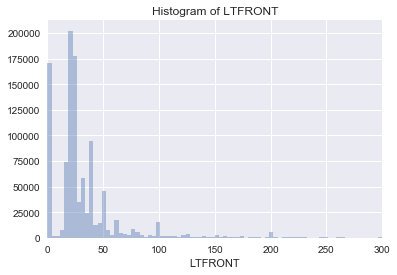

In [26]:
xhigh = 300
sns.plt.xlim(0,xhigh)
temp = mydata[mydata['LTFRONT'] <= xhigh]
sns.distplot(temp['LTFRONT'],bins=80, kde=False)
plt.title('Histogram of LTFRONT')

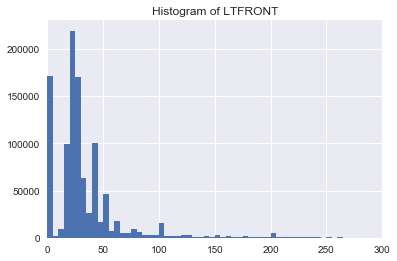

In [54]:
plt.hist(mydata['LTFRONT'],bins=2000)
plt.title('Histogram of LTFRONT')
plt.axis([0, 300,0,230000])
plt.show()

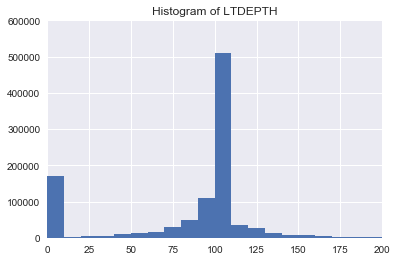

In [76]:
plt.hist(mydata['LTDEPTH'],bins=1000)
plt.title('Histogram of LTDEPTH')
plt.axis([0, 200,0,600000])
plt.show()

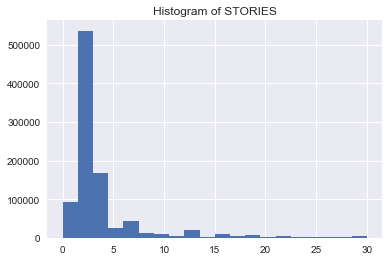

In [79]:
plt.hist(mydata['STORIES'],range=[0,30],bins=20)
plt.title('Histogram of STORIES')
plt.show()

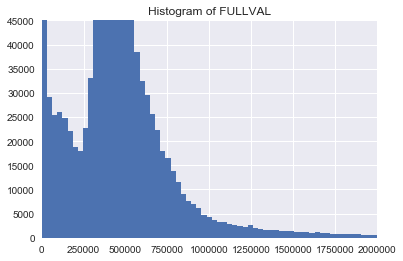

In [82]:
plt.hist(mydata['FULLVAL'],bins=200000)
plt.title('Histogram of FULLVAL')
plt.axis([0, 1000000,0,45000])
plt.show()

In [ ]:
plt.hist(mydata['AVLAND'],bins=20000)
plt.title('Histogram of AVLAND')
plt.axis([0, 50000,0,45000])
plt.show()

In [84]:
1047934.0/1048575

0.9993886941801969

In [52]:
mydata.count()

RECORD      1048575
BBLE        1048575
BLOCK       1048575
LOT         1048575
EASEMENT       4043
OWNER       1017492
BLDGCL      1048575
TAXCLASS    1048575
LTFRONT     1048575
LTDEPTH     1048575
STORIES      996433
FULLVAL     1048575
AVLAND      1048575
AVTOT       1048575
EXLAND      1048575
EXTOT       1048575
EXCD1        622642
STADDR      1047934
ZIP         1022219
EXMPTCL       14992
BLDFRONT    1048575
BLDDEPTH    1048575
AVLAND2      280966
AVTOT2       280972
EXLAND2       86675
EXTOT2       129933
EXCD2         90941
PERIOD      1048575
YEAR        1048575
VALTYPE     1048575
dtype: int64

In [87]:
1022219.0/1048575

0.9748649357461316

In [5]:
len(mydata['BLOCK'].unique())

13949

In [ ]:
mydata['BBLE'].head()

In [14]:
len(mydata['OWNER'].unique())

847054

In [14]:
mydata['BBLE'].head()

RECORD
1     3046020035
2     5046820019
3     3074790028
4     4027980132
5    1006950027E
Name: BBLE, dtype: object

In [15]:
len(mydata['LOT'].unique())

6366

In [16]:
mydata['LOT'].head()

RECORD
1     35
2     19
3     28
4    132
5     27
Name: LOT, dtype: int64

In [17]:
mydata['LOT'].count() * 100 / numrecords

100

In [18]:
mydata['LOT'].value_counts()

1       23570
20      12045
15      11904
12      11894
14      11864
16      11810
18      11763
17      11728
25      11692
21      11593
23      11469
22      11462
6       11418
19      11408
24      11392
26      11390
30      11354
28      11170
29      11149
27      11107
13      11086
7       11070
10      10876
9       10872
11      10773
8       10673
32      10616
33      10546
31      10502
35      10490
        ...  
4902        1
5548        1
5409        1
7217        1
4889        1
7223        1
5401        1
4894        1
6061        1
5406        1
8108        1
4895        1
5407        1
4892        1
6123        1
5404        1
4893        1
5405        1
7216        1
4898        1
5410        1
4899        1
5411        1
8109        1
4896        1
5408        1
6060        1
4897        1
7145        1
6043        1
Name: LOT, dtype: int64

In [19]:
mydata['ZIP'].value_counts()


10314.0    24605
11234.0    20001
10462.0    16905
10306.0    16576
11236.0    15678
11385.0    14921
11229.0    12793
11211.0    12710
10312.0    12634
11207.0    12293
11215.0    11834
11235.0    11312
11203.0    11241
11208.0    11139
11204.0    11061
10469.0    11030
11214.0    10886
11223.0    10741
10305.0    10624
11434.0    10505
11355.0    10492
11219.0    10300
11357.0     9851
11413.0     9784
11373.0     9779
11220.0     9686
10023.0     9518
10016.0     9362
10019.0     9355
10304.0     9333
           ...  
10475.0      687
10034.0      650
10039.0      596
10044.0      588
10040.0      546
10037.0      526
11040.0      450
11239.0      195
11109.0      194
11243.0      185
10020.0      120
10803.0       46
10282.0       22
11430.0       14
10309.0       14
11697.0       10
11227.0        5
33803.0        3
10281.0        3
11696.0        2
11695.0        2
10307.0        2
11242.0        2
10048.0        2
11241.0        1
11371.0        1
11005.0        1
11359.0       

In [20]:
len(mydata['ZIP'])

1048575

In [21]:
mydata['STORIES'].value_counts()

2.0      403318
3.0      128493
1.0       93606
2.5       81304
4.0       38337
6.0       30936
5.0       25971
1.5       24354
2.7       13543
12.0      12198
8.0       11953
7.0       11899
1.6        8816
9.0        7343
13.0       7330
16.0       5428
1.7        5051
21.0       4885
19.0       4866
11.0       4459
15.0       4270
10.0       3758
17.0       3457
14.0       3368
20.0       3141
32.0       3127
30.0       2905
42.0       2875
31.0       2583
27.0       2333
          ...  
6.7          12
59.0         12
3.6          11
4.7          10
1.9          10
47.0         10
74.0          6
100.0         5
3.3           5
9.5           4
1.3           3
8.5           3
62.0          3
2.8           3
1.1           3
1.4           2
2.4           2
5.7           2
63.0          2
68.0          2
61.0          1
82.0          1
2.9           1
76.0          1
78.0          1
119.0         1
85.0          1
2.1           1
114.0         1
4.2           1
Name: STORIES, dtype: in

In [24]:
e for e in mydata['STORIES'].value 
if isinstance(e, int)

SyntaxError: invalid syntax (<ipython-input-24-6a4aad090ef2>, line 1)

In [14]:
mydata['STORIES'].unique()

array([   2. ,    3. ,    nan,    6. ,    1.5,   24. ,    1. ,   21. ,
          2.5,   42. ,    8. ,    5. ,   10. ,    4. ,    2.7,    1.6,
          1.7,   12. ,   14. ,   38. ,   16. ,   20. ,   27. ,   41. ,
         11. ,    9. ,   36. ,   23. ,    7. ,   32. ,   19. ,   25. ,
         34. ,   37. ,   26. ,   13. ,   44. ,   15. ,   30. ,   40. ,
         45. ,   70. ,   22. ,   33. ,   18. ,   28. ,   54. ,   17. ,
          3.7,   57. ,   49. ,   31. ,   43. ,    4.5,   48. ,    1.8,
         50. ,   29. ,   39. ,    3.5,    2.6,   58. ,   52. ,   46. ,
         35. ,   56. ,   51. ,   60. ,   67. ,    6.5,   55. ,   65. ,
          5.5,    3.3,    2.1,   66. ,    2.3,   53. ,    5.7,    6.7,
         59. ,    7.5,    3.2,    3.6,   75. ,   68. ,    1.2,    2.2,
          6.2,    2.8,   74. ,    4.2,    4.7,   62. ,   47. ,   78. ,
        100. ,    1.9,    1.3,    1.4,   76. ,   85. ,    1.1,    9.5,
         63. ,    2.4,    8.5,  114. ,   82. ,    2.9,  119. ,   61. ])

In [27]:
mydata['STADDR'].value_counts()


501 SURF AVENUE             902
330 EAST 38 STREET          817
322 WEST 57 STREET          720
155 WEST 68 STREET          671
20 WEST 64 STREET           657
1 IRVING PLACE              650
220 RIVERSIDE BOULEVARD     628
360 FURMAN STREET           599
200 EAST 66 STREET          585
30 WEST 63 STREET           562
2 BAY CLUB DRIVE            556
350 WEST 42 STREET          556
200 RECTOR PLACE            549
301 EAST 79 STREET          538
350 WEST 50 STREET          498
630 1 AVENUE                488
635 WEST 42 STREET          483
88 GREENWICH STREET         453
150 WEST 51 STREET          447
99 JOHN STREET              445
25 CENTRAL PARK WEST        441
138-35 ELDER AVENUE         437
1623 3 AVENUE               434
1 BAY CLUB DRIVE            427
5 EAST 22 STREET            426
310 WEST 52 STREET          425
106 CENTRAL PARK SOUTH      420
25-40 SHORE BOULEVARD       415
382 CENTRAL PARK WEST       415
400 CENTRAL PARK WEST       415
                           ... 
41 PAERD

In [43]:
mydata['FULLVAL'].value_counts()

0          12762
502000      2751
366000      2260
397000      2189
472000      2179
392000      2177
405000      2152
465000      2144
393000      2131
404000      2119
358000      2113
364000      2104
451000      2103
417000      2093
438000      2093
496000      2086
431000      2080
371000      2061
478000      2050
365000      2047
400000      2029
477000      2017
399000      2007
363000      1998
445000      1995
372000      1992
459000      1990
386000      1987
398000      1985
426000      1982
           ...  
658338         1
62205          1
602803         1
674524         1
39664          1
318222         1
1053409        1
117466         1
338736         1
111317         1
101074         1
103121         1
353081         1
70337          1
203392         1
6363840        1
191166         1
180923         1
178868         1
447311         1
152233         1
1454931        1
137888         1
3615600        1
230035         1
234129         1
219784         1
35716         

In [44]:
mydata['AVLAND'].value_counts()

0          12764
45000       1225
90000        995
3045         873
22500        825
18000        783
67500        767
135000       747
180000       611
54000        608
225000       604
27000        589
12600        569
3985         551
36000        541
112500       541
764          537
3284         536
49500        532
33750        530
13500        526
47250        524
14400        502
56250        490
78750        488
51750        481
15120        462
13080        449
17640        440
450000       438
           ...  
35196          1
169868         1
41337          1
43384          1
47048          1
53191          1
61811          1
51142          1
58038          1
60087          1
48436          1
45756          1
1254094        1
258772         1
236249         1
154337         1
180978         1
365592         1
283680         1
2372652        1
83074          1
93319          1
74894          1
128148         1
84369          1
90516          1
38193          1
53666         

,RECORD,BBLE,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
0,1,3046020035,4602,35,NaN,DESMOND CAMPBELL,B1,1,18,100,...,18,36,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR
1,2,5046820019,4682,19,NaN,CINISOMO MARIO,A5,1,25,100,...,14,51,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR
2,3,3074790028,7479,28,NaN,GANGICHIODO DONALD,V0,1B,16,19,...,0,0,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR
3,4,4027980132,2798,132,NaN,DCAS,V0,1B,21,75,...,0,0,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR
4,5,1006950027E,695,27,E,CONRAIL,U6,3,0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR


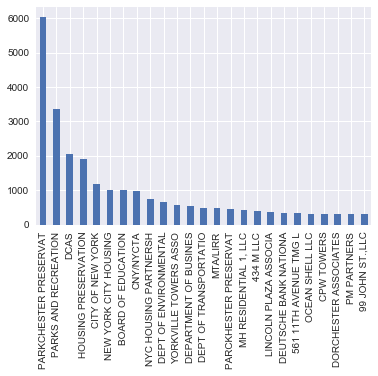

In [10]:
mydata['OWNER'].value_counts().head(25).plot(kind='bar')


Text(0.5,1,u'Count of ZIP')

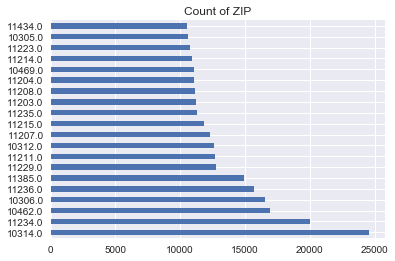

In [90]:
mydata['ZIP'].value_counts().head(20).plot(kind='barh')
plt.title('Count of ZIP')

Text(0.5,1,u'Count of EXMPTCL')

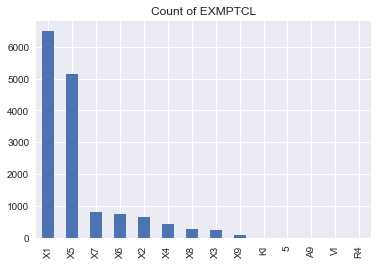

In [89]:
mydata['EXMPTCL'].value_counts().plot(kind='bar')
plt.title('Count of EXMPTCL')